# Домашняя работа 4

Необходимо создать группы клиентов, основываясь на различных характеристиках данных покупателей торгового центра.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv("customer_dataset.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [3]:
ID = df['ID']
df = df.drop(columns=['ID'])

* ID - Уникальный идентификатор клиента
* Gender - Пол клиента
* Ever_Married - Семейное положение
* Age - Возраст клиента
* Graduated - Окончил университет или нет
* Profession - Профессия
* Work_Experience - Опыт работы в годах
* Spending_Score - Оценка расходов клиента
* Family_Size - Количество членов семьи клиента (включая клиента)
* Var_1 - Анонимизированная категория для клиента

## Подготовка данных

### Анализ входных данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [5]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [6]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [7]:
df['Ever_Married'] = [0 if (item == 'No') else item for item in df['Ever_Married']]
df['Ever_Married'] = [1 if (item == 'Yes') else item for item in df['Ever_Married']]
df['Ever_Married'].value_counts()

1.0    4643
0.0    3285
Name: Ever_Married, dtype: int64

In [8]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [9]:
df['Graduated'] = [0 if (item == 'No') else item for item in df['Graduated']]
df['Graduated'] = [1 if (item == 'Yes') else item for item in df['Graduated']]
df['Graduated'].value_counts()

1.0    4968
0.0    3022
Name: Graduated, dtype: int64

C:\Users\bychk\AppData\Local\Temp\ipykernel_9092\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

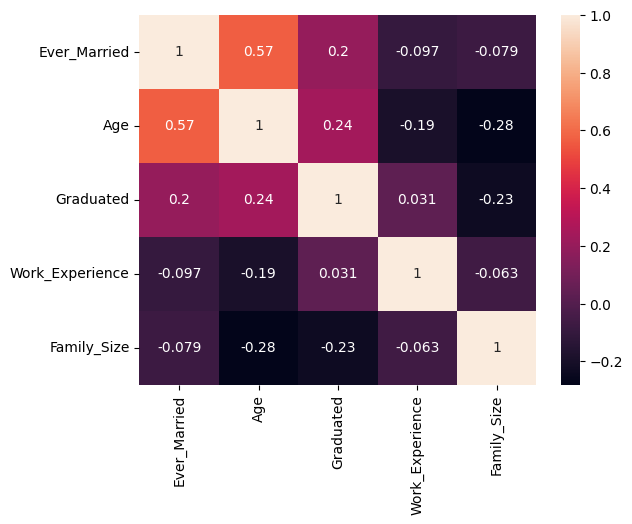

In [10]:
sns.heatmap(df.corr(), annot=True)

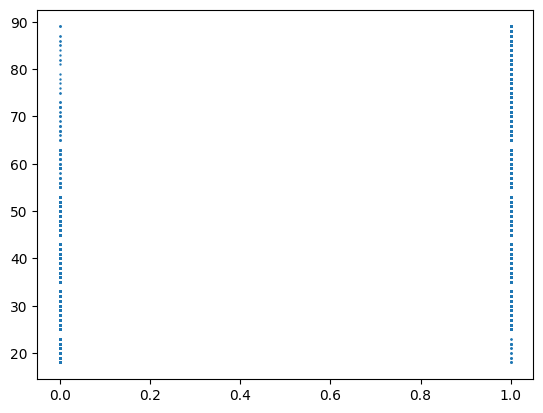

In [11]:
plt.scatter(df['Ever_Married'], df['Age'], s=0.5)

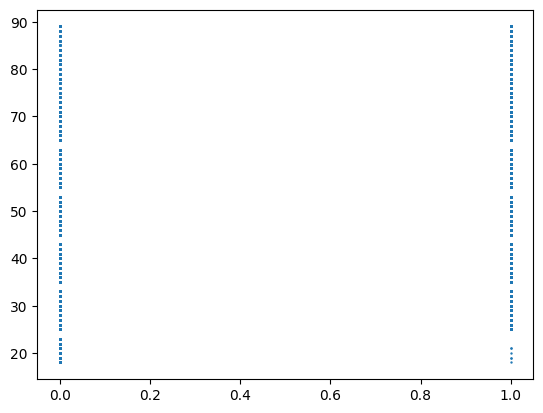

In [12]:
plt.scatter(df['Graduated'], df['Age'], s=0.5)

### Работа с пропусками

In [13]:
cols = ['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
for c in cols:
    df[c] = df[c].fillna(df[c].mode()[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 567.4+ KB


### Работа с категориальными переменными

In [15]:
df = pd.get_dummies(df, columns=['Ever_Married', 'Graduated', 'Gender', 'Profession', 'Spending_Score', 'Var_1'])

In [16]:
df.head()

,Age,Work_Experience,Family_Size,Ever_Married_0.0,Ever_Married_1.0,Graduated_0.0,Graduated_1.0,Gender_Female,Gender_Male,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,38,1.0,3.0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,40,1.0,6.0,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


## Кластеризация

### KMeans

C:\Users\bychk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bychk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bychk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

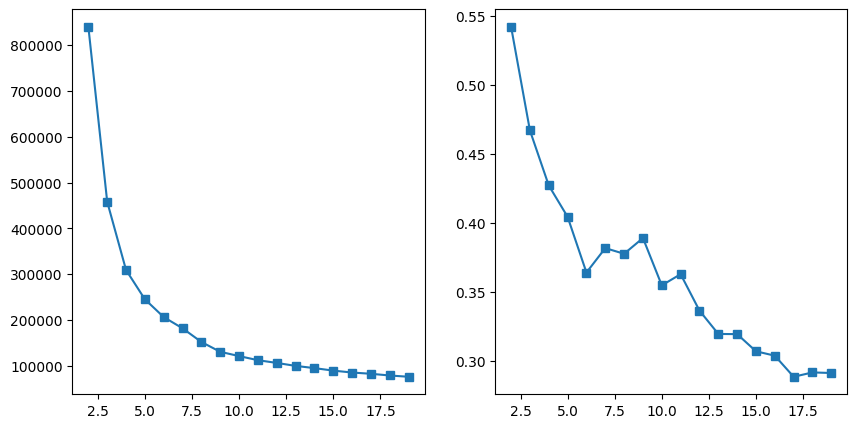

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics

sse = []
silhouettes = []

for k in range(2, 20):
    model = KMeans(k)
    model.fit(df)
    sse.append(model.inertia_)
    silhouettes.append(metrics.silhouette_score(df, model.labels_))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(range(2, 20), sse,  marker='s')
axs[1].plot(range(2, 20), silhouettes,  marker='s')
plt.show()

### Иерархическая кластеризация

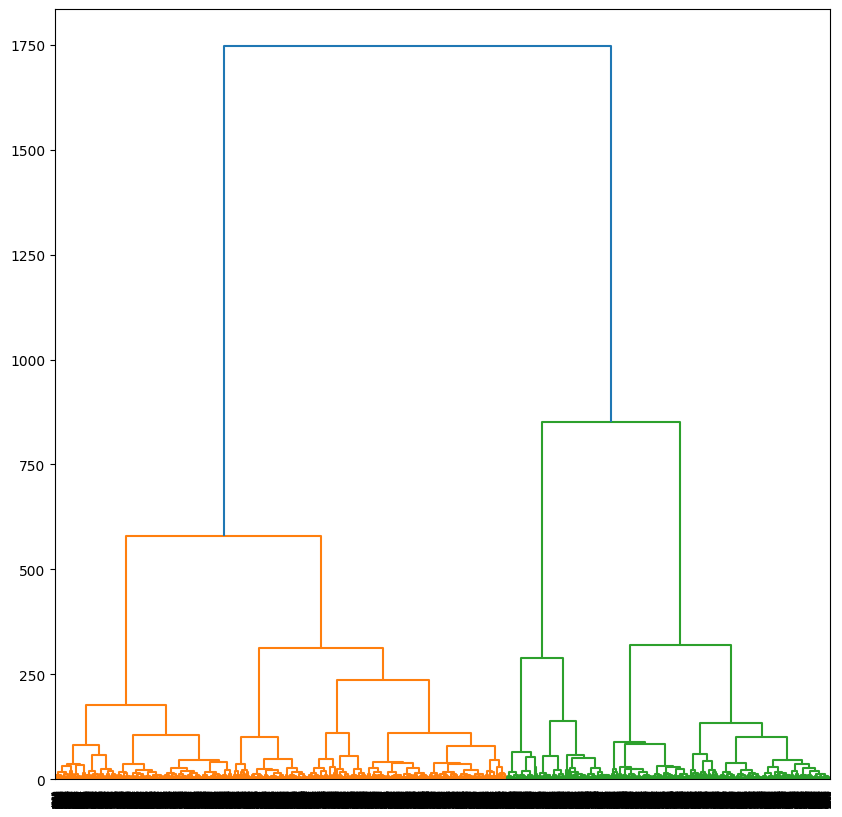

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

mtr = linkage(df, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(mtr)

### DBSCAN

In [19]:
from sklearn.preprocessing import StandardScaler

df_norm = StandardScaler().fit_transform(df)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(df_norm)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Количество кластеров: %d" % n_clusters_)
print("Количество шумов: %d" % n_noise_)


Количество кластеров: 51
Количество шумов: 6882


Для этих данных DBSCAN показал очень много шумов.

### Результаты

In [20]:
# model = KMeans(4)
# labels = model.fit_predict(df)
# labels

In [21]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
labels = model.fit_predict(df)

C:\Users\bychk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [22]:
df_result = pd.DataFrame({'ID':ID, 'Segmentation':labels})
df_result

,ID,Segmentation
0,462809,1
1,462643,3
2,466315,2
3,461735,2
4,462669,3
...,...,...
8063,464018,1
8064,464685,3
8065,465406,1
8066,467299,1


In [23]:
df_result.to_csv('result.csv', index=False)